In [99]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from IPython.display import HTML

In [100]:
filePath = "./data/no2_europe_march2020_0600.nc"

In [101]:
rootgroup = nc.Dataset(filePath, "r")

In [102]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children

In [103]:
for children in walktree(rootgroup):
    for child in children:
        print(child)

In [104]:
rootgroup.dimensions.values()

odict_values([<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 181
, <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 102
, <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 31
])

In [105]:
rootgroup.variables.values()

odict_values([<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (181,)
filling on, default _FillValue of 9.969209968386869e+36 used
, <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (102,)
filling on, default _FillValue of 9.969209968386869e+36 used
, <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: time
current shape = (31,)
filling on, default _FillValue of -2147483647 used
, <class 'netCDF4._netCDF4.Variable'>
int16 tcno2(time, latitude, longitude)
    scale_factor: 1.068852182403834e-09
    add_offset: 3.5990556072918966e-05
    _FillValue: -32767
    missing_value: -32767
    units: kg m**-2
    long_name: Total column Nitrogen dioxide
unlimited dimensions: time
cur

In [106]:
rootgroup['tcno2']

<class 'netCDF4._netCDF4.Variable'>
int16 tcno2(time, latitude, longitude)
    scale_factor: 1.068852182403834e-09
    add_offset: 3.5990556072918966e-05
    _FillValue: -32767
    missing_value: -32767
    units: kg m**-2
    long_name: Total column Nitrogen dioxide
unlimited dimensions: time
current shape = (31, 102, 181)
filling on

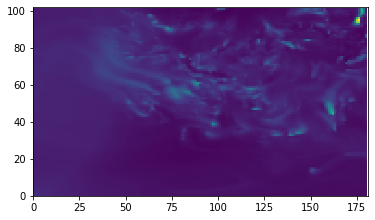

In [107]:
from matplotlib import rc
rc('animation', html='html5')

def video(data):
    T, X, Y = data.shape

    fig = plt.figure()
    ax = plt.axes(xlim=(0, Y), ylim=(0, X))
    img = plt.imshow(data[0], animated=True)

    def update(i):
        img.set_data(data[i])
        return [img]
    
    ani = FuncAnimation(fig, update, range(T), blit=True)
    return ani

a = video(rootgroup['tcno2'])
a.save('./output/test_anim.mp4')

In [98]:
rootgroup.source

AttributeError: NetCDF: Attribute not found